In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import timedelta
import datetime
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# data = pd.read_csv('All_KQ_Concat_Clean_Data\KQ#1~6_health_2022_2023.csv')
data = pd.read_csv('All_KQ_Concat_Clean_Data\KQ#8_health_2021_2023.csv')
data.head(2)

,DT,X,Y,HE,HT,Health
0,2021-01-01 00:28:00,0.9,1.9,40,73,80.000000
1,2021-01-01 00:28:20,0.8,4.0,56,73,88.013311


In [5]:
data

,DT,X,Y,HE,HT,Health
0,2021-01-01 00:28:00,0.9,1.9,40,73,80.000000
1,2021-01-01 00:28:20,0.8,4.0,56,73,88.013311
2,2021-01-01 00:28:40,1.6,3.4,56,35,90.545527
3,2021-01-01 00:29:00,1.2,3.4,59,30,89.477969
4,2021-01-01 00:29:20,1.9,5.7,64,32,90.495478
...,...,...,...,...,...,...
429236,2023-09-09 03:09:20,2.7,4.0,99,118,91.515348
429237,2023-09-09 03:09:40,2.6,2.3,31,107,91.549216
429238,2023-09-09 03:10:00,2.5,2.2,31,100,91.590638
429239,2023-09-09 03:10:20,2.5,2.1,31,97,91.634124


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137012 entries, 0 to 137011
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DT      137012 non-null  object 
 1   X       137012 non-null  float64
 2   Y       137012 non-null  float64
 3   HE      137012 non-null  int64  
 4   HT      137012 non-null  int64  
 5   Health  137012 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.3+ MB


In [5]:
# drop_li = ['1-1', '1-2', '1-3', '1-4', '2-1', '2-2', '2-3', '2-4', '3-1', '4-1', '5-1', '6-1', '6-2', 'CE', 'CT']

In [3]:
df_clean = data[data['Health'] != 80]
df_clean.shape, data.shape

((429058, 6), (429241, 6))

In [4]:
df_clean

,DT,X,Y,HE,HT,Health
1,2021-01-01 00:28:20,0.8,4.0,56,73,88.013311
2,2021-01-01 00:28:40,1.6,3.4,56,35,90.545527
3,2021-01-01 00:29:00,1.2,3.4,59,30,89.477969
4,2021-01-01 00:29:20,1.9,5.7,64,32,90.495478
5,2021-01-01 00:29:40,1.8,6.0,66,34,90.397953
...,...,...,...,...,...,...
429236,2023-09-09 03:09:20,2.7,4.0,99,118,91.515348
429237,2023-09-09 03:09:40,2.6,2.3,31,107,91.549216
429238,2023-09-09 03:10:00,2.5,2.2,31,100,91.590638
429239,2023-09-09 03:10:20,2.5,2.1,31,97,91.634124


<AxesSubplot:>

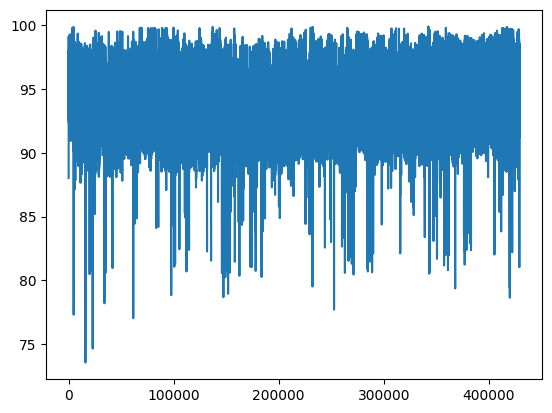

In [6]:
df_clean.Health.plot()

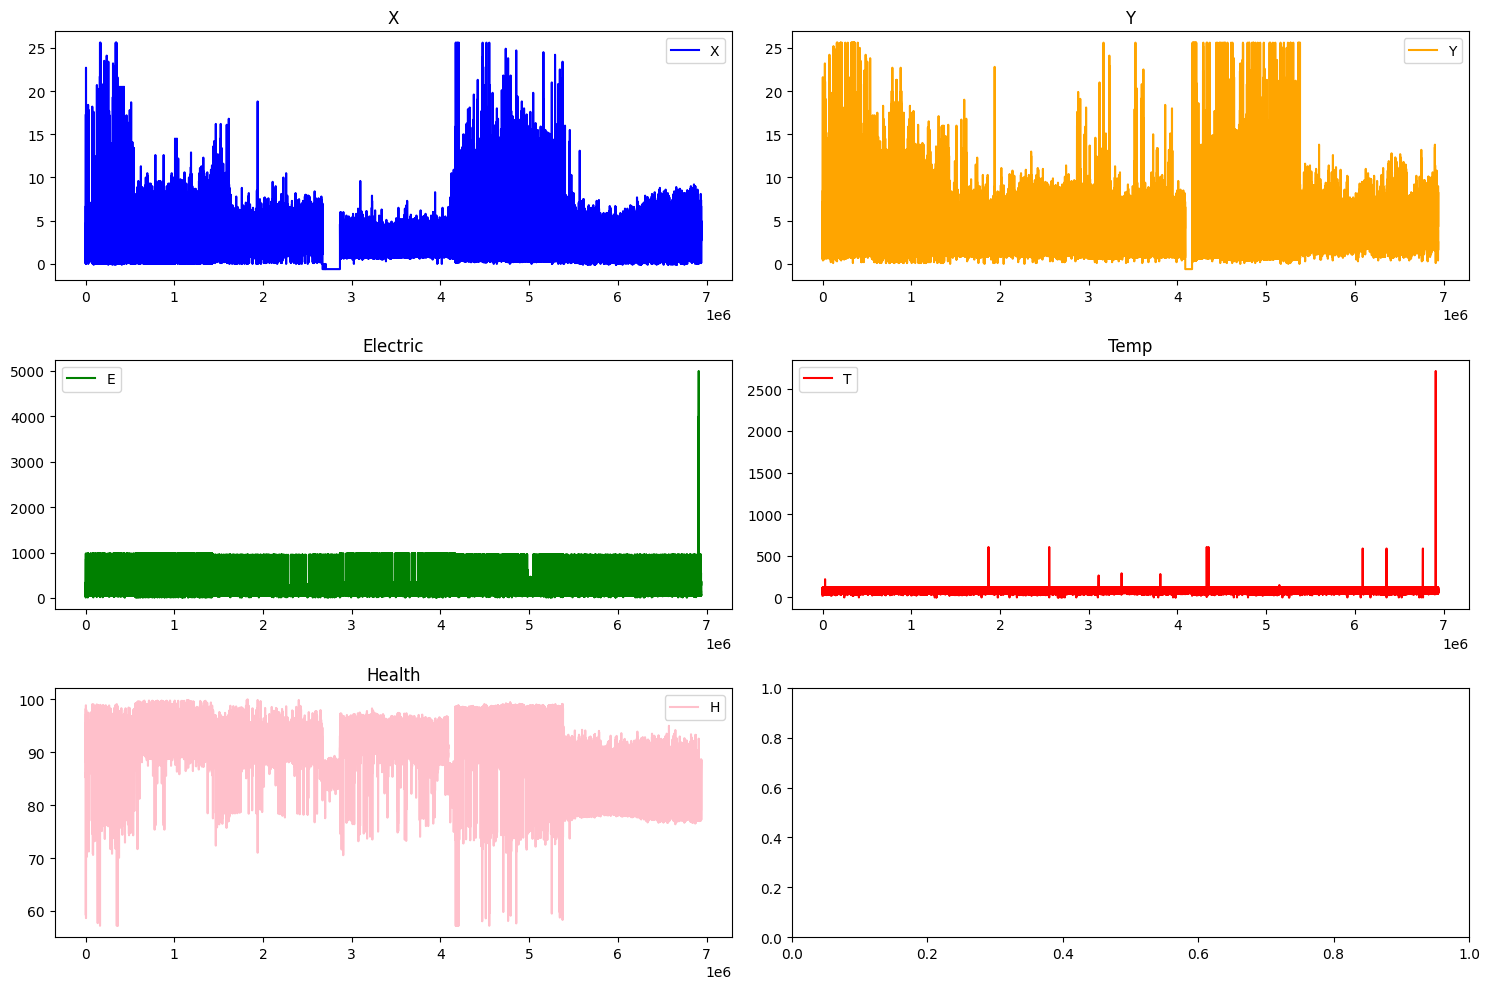

In [9]:
import matplotlib.pyplot as plt

# sc = MinMaxScaler()

# 設置子圖表的佈局 (2x2 網格)
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# 繪製第一個子圖表 (左上)
axs[0, 0].plot(np.array(df_clean['X']), label='X', color='blue')
axs[0, 0].set_title('X')
axs[0, 0].legend()

# 繪製第二個子圖表 (右上)
axs[0, 1].plot(np.array(df_clean['Y']), label='Y', color='orange')
axs[0, 1].set_title('Y')
axs[0, 1].legend()

# 繪製第三個子圖表 (左下)
axs[1, 0].plot(np.array(df_clean['HE']), label='E', color='green')
axs[1, 0].set_title('Electric')
axs[1, 0].legend()

# 繪製第四個子圖表 (右下)
axs[1, 1].plot(np.array(df_clean['HT']), label='T', color='red')
axs[1, 1].set_title('Temp')
axs[1, 1].legend()


# 繪製第六個子圖表 (右下)
axs[2, 0].plot(np.array(df_clean['Health']), label='H', color='pink')
axs[2, 0].set_title('Health')
axs[2, 0].legend()


# 調整子圖表之間的間距
plt.tight_layout()

# 顯示圖表
plt.show()


In [7]:
df_clean.describe()

,X,Y,HE,HT,Health
count,429058.000000,429058.000000,429058.000000,429058.000000,429058.000000
mean,3.028650,3.512282,72.900447,79.628983,93.492572
std,1.812053,1.641942,26.072417,24.778871,2.378336
min,0.000000,0.000000,11.000000,0.000000,73.559487
25%,1.400000,2.100000,53.000000,56.000000,91.596472
50%,2.800000,3.400000,62.000000,82.000000,93.211905
75%,4.500000,4.600000,99.000000,101.000000,95.596167
max,18.700001,25.600000,102.000000,121.000000,99.894639


In [8]:
df_clean.shape

(429058, 6)

In [9]:
X = df_clean.drop(['DT', 'Health'], axis=1)
y = df_clean['Health']
X.shape, y.shape

((429058, 4), (429058,))

In [13]:
X

,X,Y,HE,HT
0,2.6,2.1,70,23
1,1.9,1.8,69,23
2,1.8,1.8,68,23
3,2.0,1.9,68,23
4,1.6,2.0,68,23
...,...,...,...,...
7156995,4.0,2.5,58,97
7156996,4.1,2.6,58,97
7156997,4.0,2.8,59,97
7156998,4.0,2.6,58,96


# 多模型測試

In [10]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import catboost
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, accuracy_score, mean_absolute_error
from sklearn.inspection import permutation_importance

In [11]:
# 將資料分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建 MinMaxScaler 实例
scaler = RobustScaler()

# 对训练集特征进行标准化
X_train_scaled = scaler.fit_transform(X_train)

# 对测试集特征进行标准化
X_test_scaled = scaler.transform(X_test)

# 建立模型列表
models = [
          LinearRegression(), 
          Lasso(), 
          KNeighborsRegressor(), 
          DecisionTreeRegressor(), 
          RandomForestRegressor(), 
          XGBRegressor(objective ='reg:squarederror'), 
          lgb.LGBMRegressor(), 
          GradientBoostingRegressor(), 
          catboost.CatBoostRegressor(), 
        #   SVR()
          ]

# 迴圈訓練和評估模型
for model in models:
    model_name = model.__class__.__name__  # 獲取模型的名稱
    print(f"Training {model_name}...")

    # 訓練模型
    model.fit(X_train, y_train)

    # 預測測試集
    y_pred = model.predict(X_test)

    # 評估模型，這裡使用均方誤差（MSE）作為評估指標，您可以根據需要選擇其他指標
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)
    # 計算絕對百分比誤差（APE）
    ape = np.abs((y_pred - y_test) / y_test) * 100

    # 計算平均絕對百分比誤差（MAPE）
    mape = np.mean(ape)
    print(f"{model_name} - MAE: {mae}")
    print(f"{model_name} - MAPE: {mape}")
    print(f"{model_name} - MSE: {mse}")
    print(f"{model_name} - RMSE: {rmse}")
    print(f"{model_name} - R2: {r_squared}")

    # 可以在這裡進行其他後續操作，例如保存模型等
    # ...

    print("=" * 75)  # 分隔線，用於區分不同模型的訓練和評估結果

Training LinearRegression...
LinearRegression - MAE: 1.1698761222298741
LinearRegression - MAPE: 1.260855837983968
LinearRegression - MSE: 3.175341963367418
LinearRegression - RMSE: 1.7819489227717549
LinearRegression - R2: 0.43922590829369546
Training Lasso...
Lasso - MAE: 1.2623866839548241
Lasso - MAPE: 1.3572409666713352
Lasso - MSE: 3.5938856785899134
Lasso - RMSE: 1.8957546462002706
Lasso - R2: 0.3653099413046247
Training KNeighborsRegressor...
KNeighborsRegressor - MAE: 0.9348105588346133
KNeighborsRegressor - MAPE: 1.0053878204690025
KNeighborsRegressor - MSE: 2.0039117534719955
KNeighborsRegressor - RMSE: 1.4155959004857268
KNeighborsRegressor - R2: 0.6461036932787139
Training DecisionTreeRegressor...
DecisionTreeRegressor - MAE: 1.0714861696499243
DecisionTreeRegressor - MAPE: 1.1514060706074993
DecisionTreeRegressor - MSE: 2.7216696178892543
DecisionTreeRegressor - RMSE: 1.6497483498671106
DecisionTreeRegressor - R2: 0.519345687644323
Training RandomForestRegressor...
Random

In [ ]:
'''
MIXMAX
Training LinearRegression...
LinearRegression - MAPE: 1.5010555237577181
LinearRegression - RMSE: 2.0717353089321047
LinearRegression - R2: 0.19398436336393476
===========================================================================
Training Lasso...
Lasso - MAPE: 1.4904101587343344
Lasso - RMSE: 2.1879292490074813
Lasso - R2: 0.10103769858679557
===========================================================================
Training KNeighborsRegressor...
KNeighborsRegressor - MAPE: 1.4106202390711038
KNeighborsRegressor - RMSE: 1.8688296140330303
KNeighborsRegressor - R2: 0.3441351649394411
===========================================================================
Training DecisionTreeRegressor...
DecisionTreeRegressor - MAPE: 1.7797240545526933
DecisionTreeRegressor - RMSE: 2.3874172583593953
DecisionTreeRegressor - R2: -0.07036423558732197
===========================================================================
Training RandomForestRegressor...
RandomForestRegressor - MAPE: 1.4160953467195974
RandomForestRegressor - RMSE: 1.8597478488570873
RandomForestRegressor - R2: 0.35049415827652797
===========================================================================
...
XGBRegressor - MAPE: 1.2770590050684587
XGBRegressor - RMSE: 1.721539503218244
XGBRegressor - R2: 0.4434439388457333
===========================================================================
'''
'''
StandardScaler
Training LinearRegression...
LinearRegression - MAPE: 1.5010555237577181
LinearRegression - MSE: 4.292087190276003
LinearRegression - RMSE: 2.0717353089321047
LinearRegression - R2: 0.19398436336393476
===========================================================================
Training Lasso...
Lasso - MAPE: 1.4904101587343344
Lasso - MSE: 4.787034398662441
Lasso - RMSE: 2.1879292490074813
Lasso - R2: 0.10103769858679557
===========================================================================
Training KNeighborsRegressor...
KNeighborsRegressor - MAPE: 1.4106202390711038
KNeighborsRegressor - MSE: 3.492524126286845
KNeighborsRegressor - RMSE: 1.8688296140330303
KNeighborsRegressor - R2: 0.3441351649394411
===========================================================================
Training DecisionTreeRegressor...
DecisionTreeRegressor - MAPE: 1.7819835532312094
DecisionTreeRegressor - MSE: 5.7166372876544544
DecisionTreeRegressor - RMSE: 2.3909490349345495
DecisionTreeRegressor - R2: -0.07353342058504997
===========================================================================
Training RandomForestRegressor...
RandomForestRegressor - MAPE: 1.416077399553575
RandomForestRegressor - MSE: 3.457162540917881
RandomForestRegressor - RMSE: 1.8593446536126326
RandomForestRegressor - R2: 0.35077575481566714
===========================================================================
Training XGBRegressor...
XGBRegressor - MAPE: 1.2770590050684587
XGBRegressor - MSE: 2.9636982611409177
XGBRegressor - RMSE: 1.721539503218244
XGBRegressor - R2: 0.4434439388457333
===========================================================================
'''
'''
Training LinearRegression...
LinearRegression - MAE: 1.3068308781387659
LinearRegression - MAPE: 1.5010555237577181
LinearRegression - MSE: 4.292087190276003
LinearRegression - RMSE: 2.0717353089321047
LinearRegression - R2: 0.19398436336393476
===========================================================================
Training Lasso...
Lasso - MAE: 1.288143907814784
Lasso - MAPE: 1.4904101587343344
Lasso - MSE: 4.787034398662441
Lasso - RMSE: 2.1879292490074813
Lasso - R2: 0.10103769858679557
===========================================================================
Training KNeighborsRegressor...
KNeighborsRegressor - MAE: 1.238622656935145
KNeighborsRegressor - MAPE: 1.4106202390711038
KNeighborsRegressor - MSE: 3.492524126286845
KNeighborsRegressor - RMSE: 1.8688296140330303
KNeighborsRegressor - R2: 0.3441351649394411
===========================================================================
Training DecisionTreeRegressor...
DecisionTreeRegressor - MAE: 1.5658537365237142
DecisionTreeRegressor - MAPE: 1.780187315004097
DecisionTreeRegressor - MSE: 5.692266166998551
DecisionTreeRegressor - RMSE: 2.3858470544019688
DecisionTreeRegressor - R2: -0.06895674181312139
===========================================================================
Training RandomForestRegressor...
RandomForestRegressor - MAE: 1.2435150196004707
RandomForestRegressor - MAPE: 1.415429166388742
RandomForestRegressor - MSE: 3.4568004405774664
RandomForestRegressor - RMSE: 1.8592472779534912
RandomForestRegressor - R2: 0.35084375402525136
===========================================================================
Training XGBRegressor...
XGBRegressor - MAE: 1.121134270504506
XGBRegressor - MAPE: 1.2770590050684587
XGBRegressor - MSE: 2.9636982611409177
XGBRegressor - RMSE: 1.721539503218244
XGBRegressor - R2: 0.4434439388457333
===========================================================================
'''

# CAT Boost後測試最高，開始調整

In [17]:
import catboost
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建CatBoostRegressor
model = CatBoostRegressor()

# 定義超參數的網格搜索範圍
param_grid = {
    'depth': [12],
    'learning_rate': [0.1],
    'iterations': [1000]
}
'''
KQ#7
Best Parameters: {'depth': 11, 'iterations': 500, 'learning_rate': 0.1}
MAE: 1.270065617479714
MAPE: 1.3996096451981508
MSE: 2.8952190794990087
R MSE: 1.7015343309786637
R2: 0.8284100978935452
'''
'''
KQ#8
Best Parameters: {'depth': 12, 'iterations': 1000, 'learning_rate': 0.1}
MAE: 0.8571468895406674
MAPE: 0.9224055979846546
MSE: 1.713326806632473
RMSE: 1.3089411012847265
R2: 0.6974217911426204
'''

# 使用GridSearchCV進行網格搜索
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 打印最佳超參數
print("Best Parameters:", grid_search.best_params_)

# 使用最佳超參數的模型進行預測
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 評估模型，這裡使用均方誤差（MSE）作為評估指標，您可以根據需要選擇其他指標
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
# 計算絕對百分比誤差（APE）
ape = np.abs((y_pred - y_test) / y_test) * 100

# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(ape)

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r_squared}")


0:	learn: 2.2357686	total: 37.6ms	remaining: 18.8s
1:	learn: 2.1136372	total: 71.4ms	remaining: 17.8s
2:	learn: 2.0069146	total: 104ms	remaining: 17.2s
3:	learn: 1.9142366	total: 136ms	remaining: 16.9s
4:	learn: 1.8349629	total: 169ms	remaining: 16.7s
5:	learn: 1.7672992	total: 202ms	remaining: 16.6s
6:	learn: 1.7106080	total: 234ms	remaining: 16.5s
7:	learn: 1.6619161	total: 267ms	remaining: 16.4s
8:	learn: 1.6207454	total: 301ms	remaining: 16.4s
9:	learn: 1.5857987	total: 334ms	remaining: 16.4s
10:	learn: 1.5566653	total: 366ms	remaining: 16.3s
11:	learn: 1.5317617	total: 399ms	remaining: 16.2s
12:	learn: 1.5111362	total: 431ms	remaining: 16.2s
13:	learn: 1.4939077	total: 464ms	remaining: 16.1s
14:	learn: 1.4781540	total: 498ms	remaining: 16.1s
15:	learn: 1.4650175	total: 531ms	remaining: 16s
16:	learn: 1.4542717	total: 564ms	remaining: 16s
17:	learn: 1.4449277	total: 596ms	remaining: 16s
18:	learn: 1.4363934	total: 628ms	remaining: 15.9s
19:	learn: 1.4294796	total: 661ms	remaining: 

In [17]:
'''
temp 1:
Best Parameters: {'depth': 10, 'iterations': 1000, 'learning_rate': 0.2}
MAE: 1.0592020655985233
MAPE: 1.1719005752982634
MSE: 2.3437956734334136
RMSE: 1.530946006047703
R2: 0.6856455481757144
'''
'''
temp 2:
Best Parameters: {'depth': 12, 'iterations': 1500, 'learning_rate': 0.2}
MAE: 1.050388737626065
MAPE: 1.162135433942379
MSE: 2.321721687755715
RMSE: 1.5237196880514852
R2: 0.6886061542327796
'''
'''
temp3:
Best Parameters: {'depth': 14, 'iterations': 3000, 'learning_rate': 0.15}
MAE: 1.045542701363748
MAPE: 1.1567765764859146
MSE: 2.310894589067733
RMSE: 1.5201626850662178
R2: 0.6900583058479937
'''
'''
temp4:
Best Parameters: {'depth': 14, 'iterations': 3000, 'learning_rate': 0.13}
MAE: 1.0457645410564707
MAPE: 1.157029908302696
MSE: 2.309541454714961
RMSE: 1.5197175575464545
R2: 0.6902397908692912
'''

"\ntemp 1:\nBest Parameters: {'depth': 10, 'iterations': 1000, 'learning_rate': 0.2}\nMAE: 1.0592020655985233\nMAPE: 1.1719005752982634\nMSE: 2.3437956734334136\nRMSE: 1.530946006047703\nR2: 0.6856455481757144\n"

In [18]:
compare = {'actual': y_test, 'prediction': y_pred}
result = pd.DataFrame(data=compare)
result

,actual,prediction
142123,95.925499,95.140387
63994,92.793096,92.433203
426227,91.284445,91.377085
398605,92.843123,91.553038
202581,89.966164,95.177994
...,...,...
366188,91.586998,93.392174
149012,95.292345,95.649621
22274,94.798398,93.697312
142529,96.684885,95.359918


In [19]:
r2_future = r2_score(y_test, y_pred)
print("R2 Score:", r2_future)

R2 Score: 0.6974217911426204


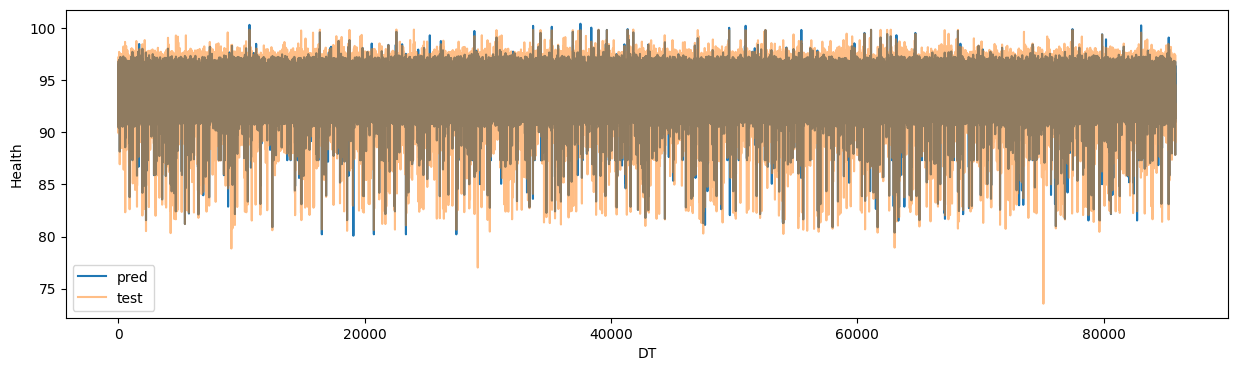

In [20]:
plt.figure(figsize=(15, 4))
plt.plot(range(len(result)), result['prediction'], label='pred')
plt.plot(range(len(result)), result['actual'], label='test', alpha=0.5)
plt.xlabel('DT')
plt.ylabel('Health')
plt.legend()

In [21]:
import joblib

joblib.dump(best_model, 'catboost_KQ#8.pkl')

['catboost_KQ#8.pkl']

# XGB測試為最高，開始調整

In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, accuracy_score, mean_absolute_error
from sklearn.inspection import permutation_importance

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [18]:
# 建立XGBoost回歸器
xgb = XGBRegressor()

param_grid = {
    'max_depth': [7],
    'learning_rate': [0.01],
    'n_estimators': [1000,2000, 3000],
    # 'min_child_weight': [1, 5, 10],  # 可尝试不同的值
    # 'gamma': [0, 0.1, 0.2],  # 可尝试不同的值
    # 'subsample': [0.8, 1.0],  # 可尝试不同的值
    # 'colsample_bytree': [0.7, 0.8, 0.9],  # 可尝试不同的值
    # 'reg_alpha': [0.001, 0.01, 0.1],  # 可尝试不同的值
    # 'reg_lambda': [0.01, 0.1, 1.0],  # 可尝试不同的值
    # 'scale_pos_weight': [1, 2, 5],  # 可尝试不同的值
    # 'max_delta_step': [0],
    # 'booster': ['gbtree', 'gblinear', 'dart'],
    # 'objective': ['reg:squarederror', 'binary:logistic', 'multi:softmax'],
    # 'num_class': [3],
    # 'eval_metric': ['rmse', 'logloss'],
    # 'tree_method': ['auto', 'exact', 'approx', 'hist', 'gpu_hist'],
    # 'verbosity': [0, 1, 2]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

# 打印最佳參數和最佳得分
print("最佳參數：", grid_search.best_params_)
print("最佳得分：", -grid_search.best_score_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
最佳參數： {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 3000}
最佳得分： 2.934302617273868


In [29]:
best_params

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000}

In [19]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

r2_future = r2_score(y_test, y_pred)
print("R2 Score:", r2_future)

Mean Squared Error (MSE): 3.0111374037744203
Root Mean Squared Error (RMSE): 1.7352629206475947
Mean Absolute Error (MAE): 1.2798696488352168
Mean Absolute Percentage Error (MAPE): 1.4104570501785354
R2 Score: 0.821244199258521


In [45]:
import joblib
joblib.dump(best_model, 'XGB_0828_4param.pkl')

['XGB_0828_4param.pkl']

In [20]:
compare = {'actual': y_test, 'prediction': y_pred}
result = pd.DataFrame(data=compare)
result

,actual,prediction
93705,85.314611,91.718208
22789,85.954138,85.770775
38150,83.914696,85.464767
32362,84.170055,84.773308
17365,87.199821,85.353928
...,...,...
16838,84.973432,84.682846
96654,92.470523,94.674835
129013,97.697600,94.685799
51488,97.287752,96.053711


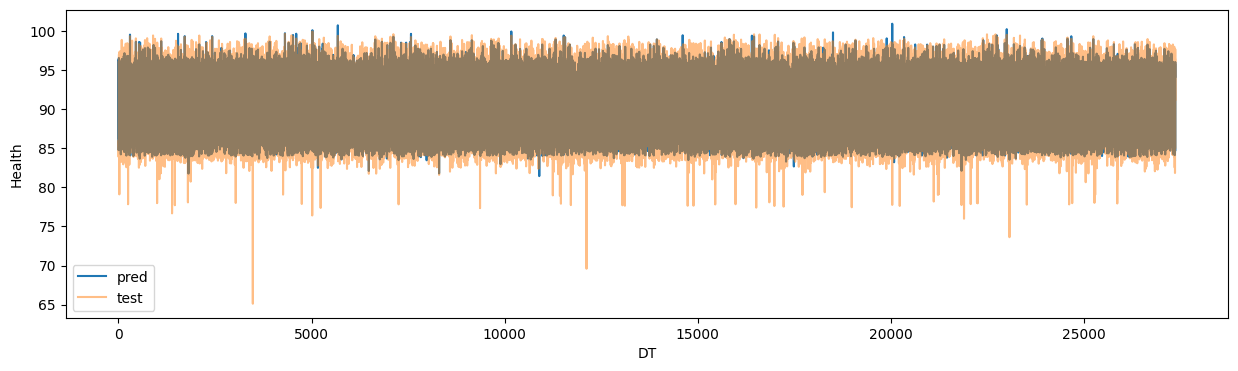

In [21]:
plt.figure(figsize=(15, 4))
plt.plot(range(len(result)), result['prediction'], label='pred')
plt.plot(range(len(result)), result['actual'], label='test', alpha=0.5)
plt.xlabel('DT')
plt.ylabel('Health')
plt.legend()

# 以下是原本完工的XGB模型，但目前看似不準確

In [51]:
import joblib

model = joblib.load('xgb_model_v2-2.pkl')

In [58]:
xgb_pred = model.predict(X_test)

r2_future = r2_score(y_test, xgb_pred)
print("R2 Score:", r2_future)

R2 Score: -0.6387988255397403


In [59]:
compare2 = {'actual': y_test, 'prediction': xgb_pred}
result2 = pd.DataFrame(data=compare2)
result2

,actual,prediction
1270483,88.078922,87.454346
1179807,89.808374,89.463593
204343,89.505312,85.683914
831800,87.319301,85.628265
83323,90.201294,86.227753
...,...,...
1277914,89.662967,88.078560
853251,89.531734,88.858162
969661,87.267627,85.969307
79273,90.233133,87.004562


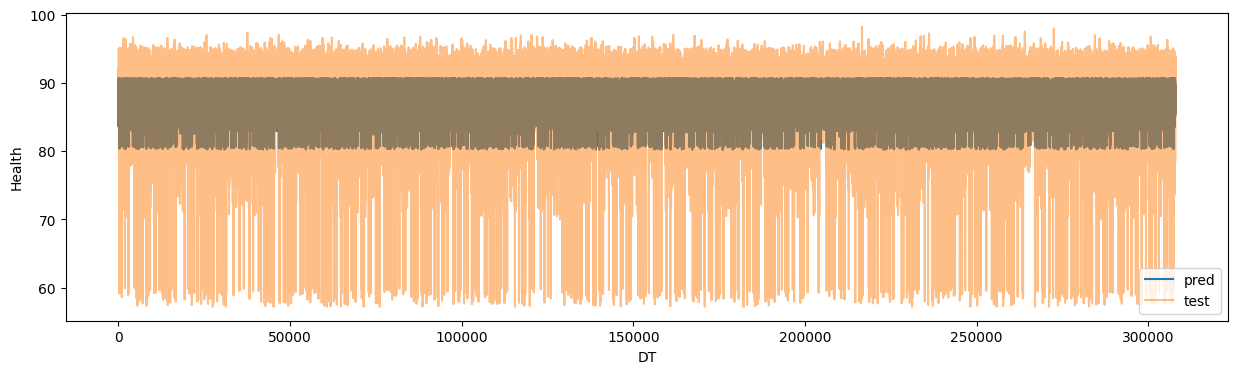

In [60]:
plt.figure(figsize=(15, 4))
plt.plot(range(len(result2)), result2['prediction'], label='pred')
plt.plot(range(len(result2)), result2['actual'], label='test', alpha=0.5)
plt.xlabel('DT')
plt.ylabel('Health')
plt.legend()

# 結論

In [46]:
'''
XGB_0828_4param.pkl使用X, Y, HE, HT作為參數
XGB_0828_5param.pkl使用X, Y, HE, HT, HC作為參數
catboost.pkl使用X, Y, HE, HT作為參數

後續將catboost.pkl作為模型上線應用
'''

'\nXGB_0828_4param.pkl使用X, Y, HE, HT作為參數\nXGB_0828_5param.pkl使用X, Y, HE, HT, HC作為參數\n\n後續將XGB_0828_4param作為模型上線應用\n'